In [1]:
import collections
from operator import itemgetter
import json

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def ParseJSONtoDict (filename):
    # Read JSON data into the datastore variable
    if filename:
        with open(filename, 'r') as f:
            datastore = json.load(f)
    return datastore


In [3]:
# Store data into JSON
def SaveNodesEdgesinJSON (nodes, edges, fileName):
    with open('json/'+fileName+'Nodes.json', 'w') as json_file:
        json.dump(nodes, json_file)

    with open('json/'+fileName+'Edges.json', 'w') as json_file:
        json.dump(edges, json_file)

In [4]:
class Networks:
    
    def __init__ (self):
        self.scseGraph = nx.Graph()
        self.CreateScseNetwork()
        
    def CreateScseNetwork (self):
        nodes = ParseJSONtoDict('json/authorNodes.json')
        edges = ParseJSONtoDict('json/authorEdges.json')
        self.scseGraph.add_nodes_from(nodes)
        self.scseGraph.add_edges_from(edges)

    def GetScseNetwork(self):
        return self.scseGraph

    def GetNumberOfStaff(self):
        return len(self.scseGraph.nodes)


In [5]:
# inititalize networks class to create networkx graphs
networks = Networks()

In [6]:
#print(networks.authorGraph.nodes.data())
print("********************")
# print(networks.authorGraph.edges())
# print(networks.authorGraph.number_of_nodes())
# print(networks.authorGraph.number_of_edges())
print(networks.scseGraph.nodes['Kheng Leong Tan'])

********************
{'size': 2, 'success': 0, 'tier1cnt': 0, 'reputation': 2, 'management': 'N', 'position': 'Lecturer', 'area': 'Cyber Security', 'start': 2019, 'end': 2019, 'publ': [{'key': 'conf/educon/TanG19', 'conftype': 'educon', 'year': '2019', 'conf': 'educon2019', 'tier': 3, 'authors': ['Kheng Leong Tan']}, {'key': 'conf/educon/TanJ19', 'conftype': 'educon', 'year': '2019', 'conf': 'educon2019', 'tier': 3, 'authors': ['Kheng Leong Tan']}]}


C:\Users\Bryan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


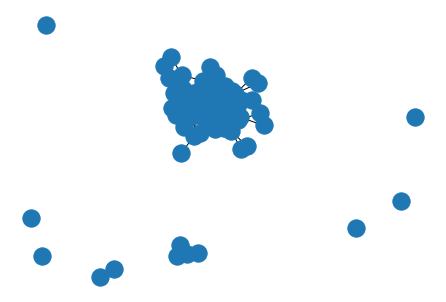

In [7]:
nx.draw(networks.GetScseNetwork())

In [8]:

# G=nx.Graph()
# G.add_node("a")
# G.add_nodes_from(["b","c"])

# G.add_edge(1,2)
# edge = ("d", "e")
# G.add_edge(*edge)
# edge = ("a", "b")
# G.add_edge(*edge)

# print("Nodes of graph: ")
# print(G.nodes())
# print("Edges of graph: ")
# print(G.edges())

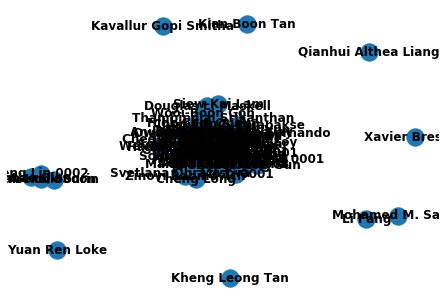

In [9]:
nx.draw(networks.GetScseNetwork(),with_labels=True, font_weight='bold')

In [10]:
nx.clustering(networks.GetScseNetwork())

{'Kheng Leong Tan': 0,
 'Cheng Long': 0,
 'Han Yu 0001': 0.5,
 'Zhiqi Shen': 0.6666666666666666,
 'Thambipillai Srikanthan': 0.1,
 'Arvind Easwaran': 0,
 'Siew-Kei Lam': 0,
 'Jun Zhao 0007': 0.2,
 'Syin Chan': 0.6666666666666666,
 'Chee Keong Kwoh 0001': 0,
 'Owen Noel Newton Fernando': 0,
 'Xueyan Tang': 0.5,
 'Jun Luo 0001': 0.3333333333333333,
 'Feng Lin 0002': 1.0,
 'Shijian Lu': 0.3333333333333333,
 'Arijit Khan': 0.3333333333333333,
 'Liang-Tien Chia': 0.24444444444444444,
 'Alexei Sourin': 0,
 'Deepu Rajan': 0.4,
 'Wentong Cai 0001': 0.4,
 'Gao Cong': 0.3333333333333333,
 'Ah-Hwee Tan': 0.3333333333333333,
 'Yang Liu 0003': 0.10714285714285714,
 'Li Fang': 0,
 'Weisi Lin': 0.16363636363636364,
 'Xavier Bresson': 0,
 'Tat-Jen Cham': 0.5,
 'Zinovi Rabinovich': 1.0,
 'Yew-Soon Ong': 0.1282051282051282,
 'Dusit Niyato': 0.2727272727272727,
 'Anupam Chattopadhyay': 0,
 'Shangwei Lin 0001': 0,
 'Guosheng Lin': 0.2,
 'Kavallur Gopi Smitha': 0,
 'Mo Li 0001': 0,
 'Aixin Sun': 0.22222222

In [52]:
#G = nx.path_graph(4)
centrality = nx.eigenvector_centrality(networks.GetScseNetwork())
sorted((v, f"{c:f}") for v, c in centrality.items())

[('A. S. Madhukumar', '0.051016'),
 ('Ah-Hwee Tan', '0.156476'),
 ('Aixin Sun', '0.181212'),
 ('Alexei Sourin', '0.000000'),
 ('Anupam Chattopadhyay', '0.026929'),
 ('Anwitaman Datta', '0.103969'),
 ('Arijit Khan', '0.033558'),
 ('Arvind Easwaran', '0.013983'),
 ('Bo An 0001', '0.178003'),
 ('Bu-Sung Lee', '0.339166'),
 ('Chai Kiat Yeo', '0.115836'),
 ('Chee Keong Kwoh 0001', '0.061706'),
 ('Chen Change Loy', '0.043740'),
 ('Cheng Long', '0.013073'),
 ('Chengzheng Sun', '0.026234'),
 ('Chiew Tong Lau', '0.145942'),
 ('Chng Eng Siong', '0.032122'),
 ('Chunyan Miao', '0.332262'),
 ('Cuntai Guan', '0.056707'),
 ('Deepu Rajan', '0.132490'),
 ('Douglas L. Maskell', '0.005338'),
 ('Dusit Niyato', '0.269769'),
 ('Erik Cambria', '0.060224'),
 ('Feng Lin 0002', '0.000000'),
 ('Gao Cong', '0.106530'),
 ('Guosheng Lin', '0.123030'),
 ('Han Yu 0001', '0.198445'),
 ('Hanwang Zhang', '0.074078'),
 ('Hiok Chai Quek', '0.031838'),
 ('Hong Lye Oh', '0.055838'),
 ('Jagath C. Rajapakse', '0.009895'),
 ('

In [22]:
def GetScseDegreeDistribution(graph):
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    degList, degCountList = zip(*degreeCount.items())

    N = len(graph.nodes)
    pk = []
    for cnt in degCountList:
        pk.append(cnt/N)

    degList = sorted(degList)
    pk = sorted(pk, reverse=True)

    plt.figure()
    plt.scatter(degList, pk, c="r", s=10)

    plt.yscale('log')
    plt.xscale('log')

    axes = plt.gca()
    axes.set_xlim([0.9,max(degList)])
    axes.set_ylim([min(pk)*0.5, 1])

    plt.title("Author Degree Distribution")
    plt.ylabel("Pk")
    plt.xlabel("Degree")
    # plt.savefig("AuthorDegreeDistribution.png")
    # graph too large to be drawn, but algorithms based on degree etc, can be done
    return plt, degList, pk

(<module 'matplotlib.pyplot' from 'C:\\Users\\Bryan\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17],
 [0.18666666666666668,
  0.13333333333333333,
  0.10666666666666667,
  0.09333333333333334,
  0.08,
  0.08,
  0.08,
  0.05333333333333334,
  0.04,
  0.04,
  0.02666666666666667,
  0.02666666666666667,
  0.013333333333333334,
  0.013333333333333334,
  0.013333333333333334,
  0.013333333333333334])

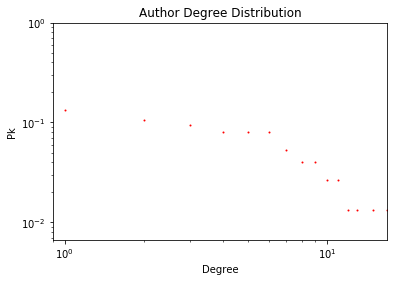

In [23]:
GetScseDegreeDistribution(networks.GetScseNetwork())

In [18]:
def FilterScseYear(Graph, startyear=2000, endyear=2020, min=1, max=4000, minSuccess = 0):
    filteredNodes = []
    varyingyear = startyear
    results = []
    
    while (varyingyear <= endyear):

        for node in Graph.nodes.data():
            if node[1]['start'] < varyingyear:
                filteredNodes.append(node[0])

        subGraph = Graph.subgraph(filteredNodes).copy()
        results.append(nx.info(subGraph))
        print("year ",varyingyear)
        print(nx.info(subGraph))
        varyingyear += 1

    return results

In [20]:
G = FilterScseYear(networks.GetScseNetwork(), startyear=2000, endyear=2021, min=1, max=4000, minSuccess = 0)

year  2000
Name: 
Type: Graph
Number of nodes: 30
Number of edges: 51
Average degree:   3.4000
year  2001
Name: 
Type: Graph
Number of nodes: 35
Number of edges: 63
Average degree:   3.6000
year  2002
Name: 
Type: Graph
Number of nodes: 37
Number of edges: 73
Average degree:   3.9459
year  2003
Name: 
Type: Graph
Number of nodes: 41
Number of edges: 85
Average degree:   4.1463
year  2004
Name: 
Type: Graph
Number of nodes: 45
Number of edges: 95
Average degree:   4.2222
year  2005
Name: 
Type: Graph
Number of nodes: 49
Number of edges: 109
Average degree:   4.4490
year  2006
Name: 
Type: Graph
Number of nodes: 51
Number of edges: 115
Average degree:   4.5098
year  2007
Name: 
Type: Graph
Number of nodes: 57
Number of edges: 129
Average degree:   4.5263
year  2008
Name: 
Type: Graph
Number of nodes: 60
Number of edges: 136
Average degree:   4.5333
year  2009
Name: 
Type: Graph
Number of nodes: 62
Number of edges: 138
Average degree:   4.4516
year  2010
Name: 
Type: Graph
Number of nodes

In [24]:
print(G)

['Name: \nType: Graph\nNumber of nodes: 30\nNumber of edges: 51\nAverage degree:   3.4000', 'Name: \nType: Graph\nNumber of nodes: 35\nNumber of edges: 63\nAverage degree:   3.6000', 'Name: \nType: Graph\nNumber of nodes: 37\nNumber of edges: 73\nAverage degree:   3.9459', 'Name: \nType: Graph\nNumber of nodes: 41\nNumber of edges: 85\nAverage degree:   4.1463', 'Name: \nType: Graph\nNumber of nodes: 45\nNumber of edges: 95\nAverage degree:   4.2222', 'Name: \nType: Graph\nNumber of nodes: 49\nNumber of edges: 109\nAverage degree:   4.4490', 'Name: \nType: Graph\nNumber of nodes: 51\nNumber of edges: 115\nAverage degree:   4.5098', 'Name: \nType: Graph\nNumber of nodes: 57\nNumber of edges: 129\nAverage degree:   4.5263', 'Name: \nType: Graph\nNumber of nodes: 60\nNumber of edges: 136\nAverage degree:   4.5333', 'Name: \nType: Graph\nNumber of nodes: 62\nNumber of edges: 138\nAverage degree:   4.4516', 'Name: \nType: Graph\nNumber of nodes: 66\nNumber of edges: 153\nAverage degree:   4

In [25]:

def DrawGraph(graph):
    nodessize = []
    edgecolors = []
    nodescolor = []

    edgeslist = graph.edges.data()

    for node in graph.nodes.data():
        nodessize.append(node[1]['size'])
        if node[1]['tier'] == 1:
            nodescolor.append([1,0,0])
        elif node[1]['tier'] == 2:
            nodescolor.append([1,0.2,0.2])
        elif node[1]['tier'] == 3:
            nodescolor.append([1,0.4,0.4])

    maxSize = max(nodessize)
    minSize = min(nodessize)
    maxNodeSize = 5000
    for size in nodessize:
        size = (size - minSize) / (maxSize -minSize) * maxNodeSize + 1000

    edgemax = max(edgeslist, key=lambda x: x[2]['weight'])[2]['weight']
    edgemin = min(edgeslist, key=lambda x: x[2]['weight'])[2]['weight']
    M = graph.number_of_edges()
    edgealphas = []
    for edge in edgeslist:
        weight = edge[2]['weight']
        color = (weight - edgemin) / (edgemax - edgemin)
        edgecolors.append(color)
        edgealphas.append(color)

    # plt.figure(figsize=(20,20))
    pos=nx.spring_layout(graph, k=5)

    nx.draw_networkx_nodes(
        graph,
        pos=pos,
        node_color=nodescolor,
        node_size=nodessize
    )

    edges = nx.draw_networkx_edges(
        graph,
        pos=pos,
        arrowstyle="->",
        arrowsize=5,
        edge_color=edgecolors,
        edge_cmap=plt.cm.Greys,
        width=1,
    )

    nx.draw_networkx_labels(
        graph, pos=pos, font_size=6,
        font_color='k', font_family='sans-serif',
        font_weight='normal', alpha=None,
        bbox=None, ax=None
    )

    # set alpha value for each edge
    for i in range(M):
        edges[i].set_alpha(edgealphas[i])


In [26]:
DrawGraph(G)

AttributeError: 'list' object has no attribute 'edges'

In [27]:
print(type(G))

<class 'list'>


In [38]:
def filterGraphs(graph, rank1, rank2 = None):
    filteredNodes= []
    if rank2:
        for node in graph.nodes.data():
            if node[1]['position'] == rank1 or node[1]['position']== rank2:
                filteredNodes.append(node[0])
    else:
        for node in graph.nodes.data():
            if node[1]['position'] == rank1:
                filteredNodes.append(node[0])

    subGraph = graph.subgraph(filteredNodes).copy()
    return subGraph

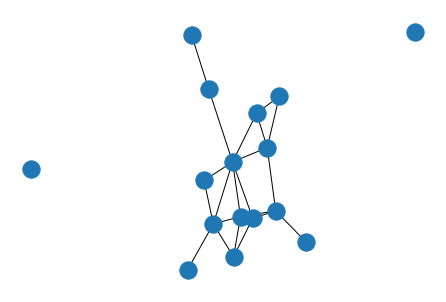

In [39]:
Profs = filterGraphs(networks.GetScseNetwork(),"Professor")
nx.draw(Profs)

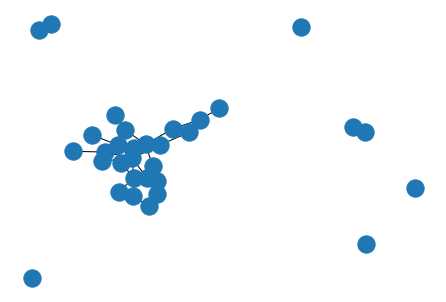

In [40]:
AssoProfs = filterGraphs(networks.GetScseNetwork(),"Associate Professor")
nx.draw(AssoProfs)

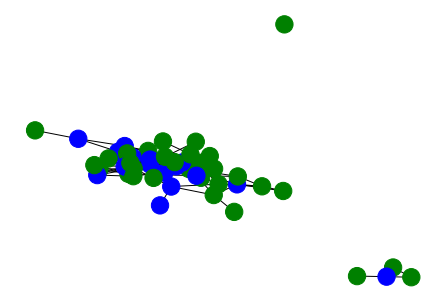

In [44]:
tgt = filterGraphs(networks.GetScseNetwork(),"Associate Professor", "Professor")
#nx.draw(tgt)
color_map = []
for node in tgt.node.data():
    if node[1]['position'] == "Professor":
        color_map.append('blue')
    else: 
        color_map.append('green')      
nx.draw(tgt, node_color=color_map)
plt.show()

In [49]:
print(nx.info(tgt))
print("****************************")
print(nx.clustering(tgt))
centrality = nx.eigenvector_centrality(networks.GetScseNetwork())
print("****************************")
print(sorted((v, f"{c:0.2f}") for v, c in centrality.items()))

Name: 
Type: Graph
Number of nodes: 48
Number of edges: 117
Average degree:   4.8750
****************************
{'Thambipillai Srikanthan': 0.16666666666666666, 'Arvind Easwaran': 0, 'Syin Chan': 0.6666666666666666, 'Chee Keong Kwoh 0001': 0, 'Xueyan Tang': 0.5, 'Jun Luo 0001': 0.3333333333333333, 'Feng Lin 0002': 1.0, 'Liang-Tien Chia': 0.24444444444444444, 'Alexei Sourin': 0, 'Deepu Rajan': 0.4, 'Wentong Cai 0001': 0.4, 'Gao Cong': 0.6666666666666666, 'Ah-Hwee Tan': 0.3333333333333333, 'Yang Liu 0003': 0.3, 'Weisi Lin': 0.17777777777777778, 'Xavier Bresson': 0, 'Tat-Jen Cham': 0.5, 'Yew-Soon Ong': 0.16363636363636364, 'Dusit Niyato': 0.25, 'Anupam Chattopadhyay': 0, 'Mo Li 0001': 0, 'Aixin Sun': 0.2222222222222222, 'Sinno Jialin Pan': 0.3, 'Jianmin Zheng': 0.6666666666666666, 'A. S. Madhukumar': 0, 'Chen Change Loy': 0, 'Jianfei Cai 0001': 0.3333333333333333, 'Bo An 0001': 0.5, 'Kemao Qian': 1.0, 'Chiew Tong Lau': 0.21428571428571427, 'Jagath C. Rajapakse': 0, 'Douglas L. Maskell':